# Business Analytics for a Retail Store using Python

## Part 3: Making Predictions using the Data

This is the final section of this project. We want to answer 2 questions in this part:
 1. How does the profit change over time in Store 312?
 2. What profit is Store_312 projected to make by the end of 2016?
 
Let's answer these one at a time, in that order.

### 1. How does the profit change over time in Store 312?

Let's start by importing our modules and data.

In [2]:
import pandas as pd
import datetime as dt
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

import seaborn as sns

% matplotlib inline

In [3]:
Store_312 = pd.read_csv("/Users/mac/Desktop/Data Science/Projects/TinyCo Project/Store_312_ts.csv", index_col=0)

In [4]:
Store_312.head()

,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales,Month,Year/Month,Week,Week of month,Period of month,Unit Cost,Profit,Day of the week
0,79444,50012011250,312,2014-08-04,3.0,29.97,8,2014-08,2014-31,1,Beginning,7.5,7.47,1
1,79445,50012011250,312,2014-08-05,2.0,19.98,8,2014-08,2014-31,1,Beginning,7.5,4.98,2
2,79446,50012011250,312,2014-08-06,5.0,49.95,8,2014-08,2014-31,1,Beginning,7.5,12.45,3
3,79447,50012011250,312,2014-08-07,3.0,29.97,8,2014-08,2014-31,1,Beginning,7.5,7.47,4
4,79448,50012011250,312,2014-08-08,7.0,69.93,8,2014-08,2014-31,1,Beginning,7.5,17.43,5


Let's drop a few columns we won't be using here.

In [5]:
Store_312 = Store_312[["Date", "SKU", "Profit"]]

In [6]:
Store_312.head()

,Date,SKU,Profit
0,2014-08-04,50012011250,7.47
1,2014-08-05,50012011250,4.98
2,2014-08-06,50012011250,12.45
3,2014-08-07,50012011250,7.47
4,2014-08-08,50012011250,17.43


That looks much cleaner. Now let's check our dtypes.

In [7]:
Store_312.dtypes

Date       object
SKU         int64
Profit    float64
dtype: object

"SKU" and "Profit" are ok, but we would like to use our dates in the "Date" column as datetime objects so we should convert them to that.

In [8]:
Store_312["Date"] = pd.to_datetime(Store_312["Date"])
Store_312.dtypes

Date      datetime64[ns]
SKU                int64
Profit           float64
dtype: object

Now that we have the "Date" column in the correct format, let's set it as our dataframe index. This will make time series analysis in pandas much easier.

In [9]:
Store_312.set_index("Date", inplace=True)
Store_312.head()

,SKU,Profit
Date,,
2014-08-04,50012011250,7.47
2014-08-05,50012011250,4.98
2014-08-06,50012011250,12.45
2014-08-07,50012011250,7.47
2014-08-08,50012011250,17.43


#### Visualizing the Data

Let's plot a time series of the profit for Store 312.

In [10]:
sns.set(rc={'figure.figsize':(12, 5)})

(array([735415., 735446., 735477., 735507., 735538., 735568., 735599.,
        735630., 735658., 735689., 735719., 735750., 735780., 735811.,
        735842., 735872., 735903., 735933., 735964., 735995., 736024.,
        736055., 736085., 736116., 736146., 736177., 736208.]),
 <a list of 27 Text xticklabel objects>)

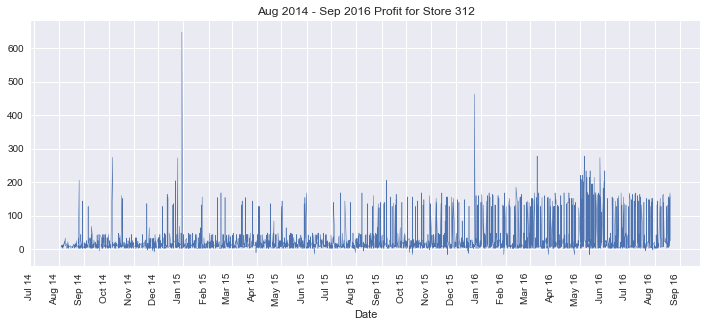

In [11]:
ax = Store_312["Profit"].plot(linewidth=0.5)
ax.set_title("Aug 2014 - Sep 2016 Profit for Store 312")
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
plt.xticks(rotation=90)

The plot shows remarkable peaks in profit in late December of 2014, as well as late December of 2015. This suggests seasonality, a pattern in the data at a one year time interval. This isn't surprising as we traditionally expect a peak in sales during the festive period. However, the peak in Dec 2015 is significantly less than that in Dec 2014. Interestingly, though, profits and buying activity from around September 2015 going onwards increases in margin, with peaks in and around March 2016 & May 2016. Let's look at this more closely.

(array([735477., 735568., 735658., 735750., 735842., 735933., 736024.,
        736116., 736208.]), <a list of 9 Text xticklabel objects>)

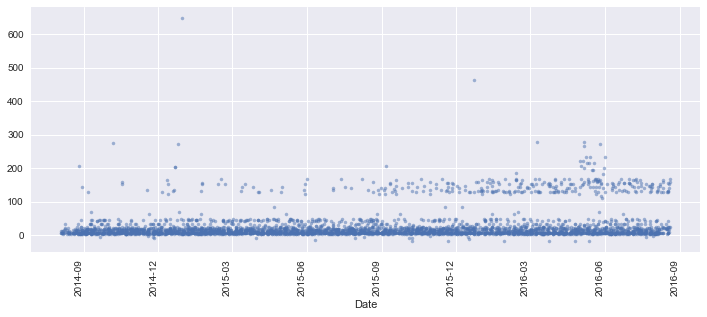

In [12]:
Store_312["Profit"].plot(marker='.', alpha=0.5, linestyle='None')
plt.xticks(rotation=90)

The dot plot, as opposed to the line plot, more clearly shows us outliers and variations in the data. For instance, the plot above shows us 2 clearly defined clusters. One has a median profit of around 50, while the other has a median profit of 150. The latter cluster is the one responsible for our peaks. Should we be interested to know when and in waht category peaks arise, we can subset that cluster from our dataframe.

For interests sake, let's subset the upper cluster and see if there's anything perculiar about it.

In [13]:
Store_312.loc[Store_312["Profit"]>100, "SKU"].unique()

array([50012011250, 50013000110,  8000451112, 50012011240])

Interestingly, only 4 of our 9 total SKUs produce profits of $100/day. Let's view the SKU_Master table to know more about these SKUs.

In [14]:
SKU_Master = pd.read_csv("/Users/mac/Desktop/Data Science/Projects/TinyCo Project/SKU_Master_clean.csv", index_col=0)

In [15]:
SKU_Master

,Department,Class,Style,Color,SKU,Cost,Price,Vendor,Profit Margin (%)
0,800,5,20,2,8000520021,7.5,9.99,MA Excellent Products,33.200000
1,800,4,51,11,8000451112,9.0,12.99,MA Excellent Products,44.333333
2,731,24,55,52,7312455520,25.0,31.99,MA Excellent Products,27.960000
3,731,24,55,53,7312455530,14.5,22.99,GA General Wholesales,58.551724
4,5001,201,12,4,50012011240,2.5,7.99,China Imports,219.600000
5,5001,201,12,5,50012011250,7.5,9.99,China Imports,33.200000
6,5001,201,13,4,50012011341,2.5,4.99,China Imports,99.600000
7,5001,300,1,1,50013000110,6.5,12.99,China Imports,99.846154
8,5001,201,13,4,50012011340,2.5,4.99,China Imports,99.600000


Three of the products in this cluster belong to the same department and have the same vendor: **China Imports**. The fourth one belongs to **MA Excellent Products**.

After this revelation, let's plot a Pareto Chart to see the contribution of our SKUs to our profits.

In [16]:
def create_pareto_chart(df, quant_variable):
    df["cumpercentage"] = df[quant_variable].cumsum()/df[quant_variable].sum()*100

    fig, ax = plt.subplots()
    ax.bar(df.index, df[quant_variable], color="C0")
    plt.xticks(rotation=90)
    plt.grid()
    ax2 = ax.twinx()
    ax2.plot(df.index, df["cumpercentage"], color="C1", marker="D", ms=7)
    ax2.yaxis.set_major_formatter(ticker.PercentFormatter())

    ax.tick_params(axis="y", colors="C0")
    ax2.tick_params(axis="y", colors="C1")
    plt.grid()

In [17]:
Store_312_copy = Store_312.copy()

In [18]:
Store_312_copy["SKU"] = Store_312_copy["SKU"].apply(lambda x: str(x))

In [19]:
Store_312_Pareto = Store_312_copy.groupby("SKU").agg(np.mean).sort_values("Profit", ascending=False)

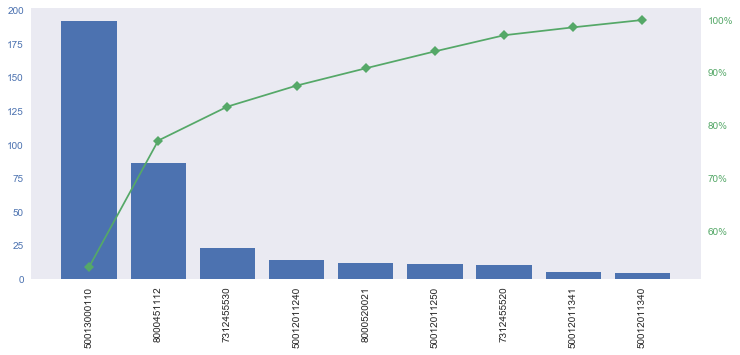

In [20]:
create_pareto_chart(Store_312_Pareto, "Profit")

The Pareto Chart show us that, on average, 22% of our SKUs are responsible for around 79% of our profits.

Now going back to our dotted time series plot, we can notice that the profit peaks increase in frequency in the periods Sep 2014 to Sep 2015 and Sep 2015 to Sep 2016. Let's take a closer look at that by plotting time series for those 2 periods.

(0, 700)

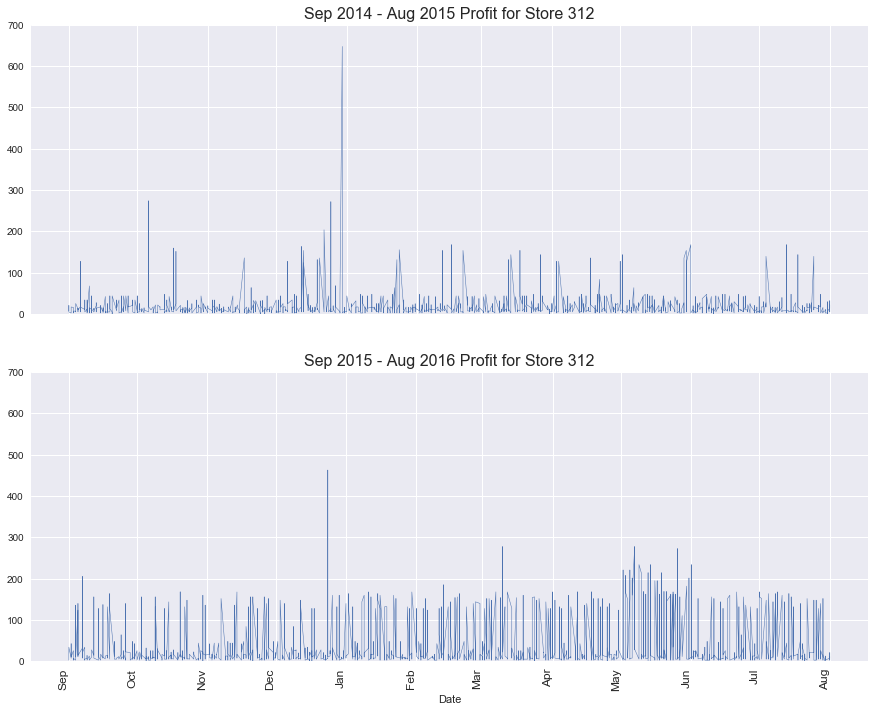

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=1)

ax_1 = Store_312.loc["2014-09":"2015-08-1", "Profit"].plot(linewidth=0.5, ax=axes[0], figsize=(15,13))
ax_2 = Store_312.loc["2015-09":"2016-08-1", "Profit"].plot(linewidth=0.5, ax=axes[1])

ax_1.set_title("Sep 2014 - Aug 2015 Profit for Store 312", fontsize=16)
ax_1.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
ax_1.xaxis.set_major_formatter(mdates.DateFormatter('%b %y %d'))
ax_1.tick_params(axis='x', which='both', bottom=True, top=True, labelbottom=False, rotation=90)
ax_1.set_xlabel("")

ax_2.set_title("Sep 2015 - Aug 2016 Profit for Store 312", fontsize=16)
ax_2.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
ax_2.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax_2.tick_params(axis='x', which='both', labelsize=12)
plt.xticks(rotation=90)

ax_1.set_ylim(0,700)
ax_2.set_ylim(0,700)

The plots above allow us to compare how profits behaved in the same month but in two different time periods.

The plots clearly show how profit peaks increased in magnitude in each month in the second period as compared to the first. The frequency of these peaks also increased as the second period went on. The month of May in particular in the latter period was host to peaks in profit before the trend mirrored the subsequent months thereafter.

It's also important to note that in the first period, profit peaks at the end of the month. However, in the second period, profit peaks throught the month.

It's safe to say the profits are increasing over time. To test this claim, let's aggregate profits over week, month & quarter and plot the time series over these periods to observe the trend.

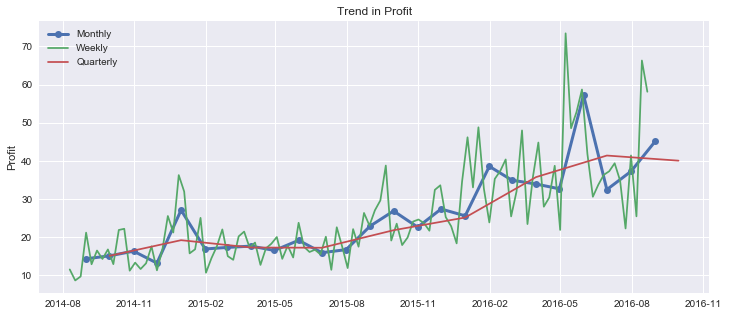

In [53]:
fig_1, ax_ = plt.subplots()
ax_.plot(Store_312.resample("M").mean()["Profit"], linewidth=3, marker="o", label="Monthly")
ax_.set_ylabel("Profit")
ax_.set_title("Trend in Profit")
ax_.plot(Store_312[["Profit"]].resample("W").mean(), label="Weekly")
ax_.plot(Store_312.loc["2014-09":, "Profit"].resample("Q").mean(), label="Quarterly")
ax_.legend()
plt.grid(which='minor', axis='both')

The upward trend in profits over time is more aparent in this resampled (Weekly) time series. The peaks in Dec 2014 and Dec 2015 are also evident here. The earlier stated peak profit activity in May 2016 is also more pronounced on this chart.

The "Weekly" time series is useful but has too many peaks to make sense of a trend. The "Monthly" time series still has peaks, which describe the performance of each month. This blue line also gives us a snapshot of the seasonality in our data. There's a dip in profits in the middle of the year around June, and then a rise towards the end as we approach peaks in the festive period.

An upward trend can also be noticed in the blue line, but we can smooth it even further. Aggregating over quarters removes the peaks, and shows us a clearer trend line of our profits over time.

We can also ask other granular questions such as:
 - How do the profits change on a monthly or weekly cycle?
 - In a week, what is the buying pattern on weekends vs weekdays?
 - How does each SKU's Profit behave over time?
 - How do department profits behave over time?

### 2. What profit is Store_312 projected to make by the end of 2016?

Before we can develop a model that can produce trustworthy results, we need to split our data into a train set and a validation set. The logic is to test the validation set on a model we would have built using the train set to assess the model's ability to produce results with the least error.

For the forecast to be meaningful, let's resample our weekly TS by sum.

In [54]:
print(Store_312[["Profit"]].resample("W").sum())
print("The year/monthly data has", Store_312["Profit"].resample("W").sum().shape[0], "rows")

             Profit
Date               
2014-08-10   173.52
2014-08-17   121.62
2014-08-24   204.42
2014-08-31   678.78
2014-09-07   465.42
2014-09-14   594.78
2014-09-21   401.07
2014-09-28   504.28
2014-10-05   453.56
2014-10-12   525.81
2014-10-19   822.11
2014-10-26   348.66
2014-11-02   507.38
2014-11-09   420.55
2014-11-16   316.20
2014-11-23   510.92
2014-11-30   351.57
2014-12-07   587.12
2014-12-14   843.73
2014-12-21   743.72
2014-12-28  1052.23
2015-01-04  1023.00
2015-01-11   584.07
2015-01-18   623.55
2015-01-25   928.08
2015-02-01   364.10
2015-02-08   565.67
2015-02-15   511.56
2015-02-22   838.01
2015-03-01   511.81
...             ...
2016-01-31   716.58
2016-02-07  1023.39
2016-02-14  1345.17
2016-02-21  1574.96
2016-02-28   891.30
2016-03-06  1122.15
2016-03-13  1679.60
2016-03-20   844.40
2016-03-27  1253.69
2016-04-03  1613.55
2016-04-10  1176.57
2016-04-17  1095.15
2016-04-24  1161.86
2016-05-01   810.96
2016-05-08  2496.39
2016-05-15  2137.17
2016-05-22  2165.60


Let's select the first 20 months as our taining dataset and the last 5 as our validation dataset.

In [120]:
Train = Store_312[["Profit"]].resample("W").sum().loc["2014-08-10":"2016-03-27"]
Valid = Store_312[["Profit"]].resample("W").sum().loc["2016-04-03":"2016-08-21"]

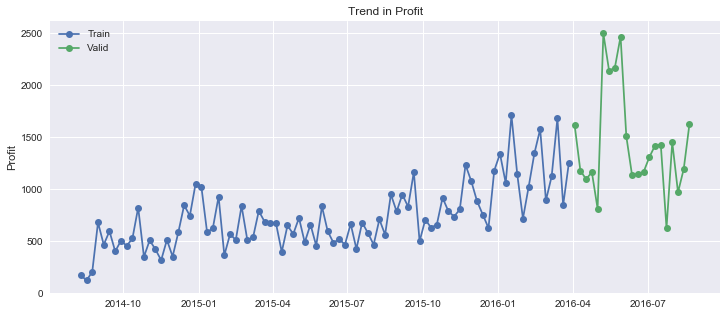

In [121]:
fig_2, ax_5 = plt.subplots()
ax_5.plot(Train["Profit"], label="Train", marker="o")
ax_5.set_ylabel("Profit")
ax_5.set_title("Trend in Profit")
ax_5.plot(Valid["Profit"], label="Valid", marker="o")
ax_5.legend(loc="upper left")
plt.grid(which='minor', axis='both')

#### Holt Winter's

Let's model our problem using the Holt Winter's method to start with. We'll compare this with the ARIMA and SARIMAX models later to test which model produces the least RMSE.

The reason why we're using HW is because we believe there to be a trend and seasonality in our data. Lets decompose our TS and look at these much closer.

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [70]:
week = Store_312[["Profit"]].resample("W").sum()

decomposition = seasonal_decompose(week)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

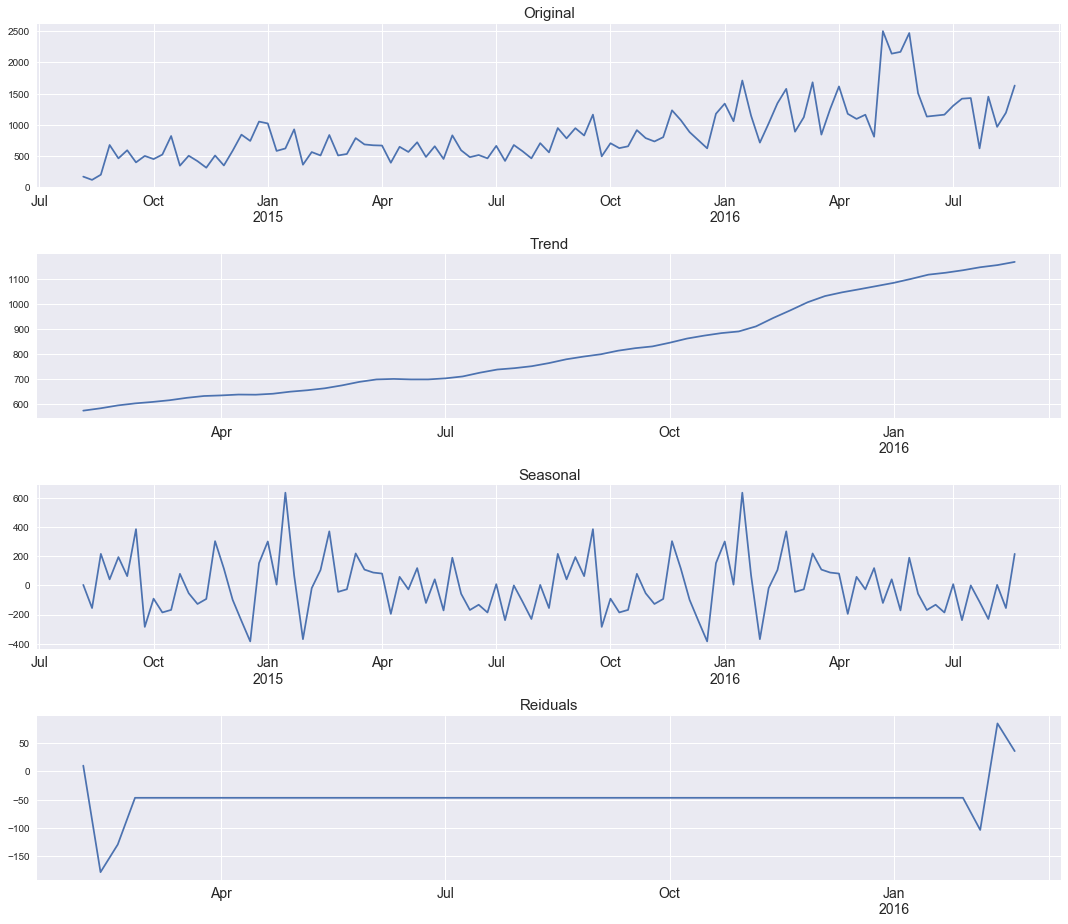

In [69]:
fig, axe = plt.subplots(nrows=4, ncols=1)

w = week["Profit"].plot(ax=axe[0], figsize=(15,13))
w.tick_params(axis='x', which='both', labelsize=14)
w.set_title('Original', fontsize=15)
w.set_xlabel("")
w.legend().set_visible(False)

t = trend.plot(ax=axe[1], figsize=(15,13))
t.tick_params(axis='x', which='both', labelsize=14)
t.set_title('Trend', fontsize=15)
t.set_xlabel("")
t.legend().set_visible(False)

s = seasonal.plot(ax=axe[2], figsize=(15,13))
s.tick_params(axis='x', which='both', labelsize=14)
s.set_title('Seasonal', fontsize=15)
s.set_xlabel("")
s.legend().set_visible(False)

r = residual.plot(ax=axe[3], figsize=(15,13))
r.tick_params(axis='x', which='both', labelsize=14)
r.set_title('Reiduals', fontsize=15)
r.set_xlabel("")
r.legend().set_visible(False)

plt.tight_layout()

The plots above show us more clearly the seasonal and trend patterns more clearly.

In [71]:
from statsmodels.tsa.api import ExponentialSmoothing

In [161]:
fit1 = ExponentialSmoothing(Train["Profit"], trend='add', seasonal='mul', seasonal_periods=12).fit(use_boxcox=True)
valid_hat = fit1.forecast(21)

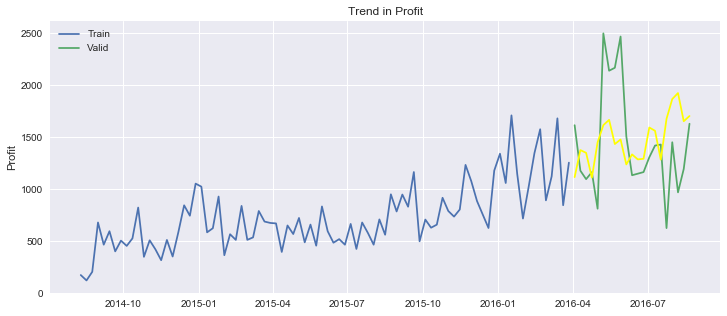

In [162]:
fig_3, ax_6 = plt.subplots()
ax_6.plot(Train["Profit"], label="Train")
ax_6.set_ylabel("Profit")
ax_6.set_title("Trend in Profit")
ax_6.plot(Valid["Profit"], label="Valid")
ax_6.legend(loc="upper left")
plt.grid(which='minor', axis='both')

#ax_6.plot(fit1.fittedvalues,color='red')

ax_6.plot(valid_hat, color='yellow')

In [118]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [163]:
rms = sqrt(mean_squared_error(Valid, valid_hat))
rms

532.3494853904493

In [145]:
fit2 = ExponentialSmoothing(Train["Profit"], trend='mul', seasonal='mul', seasonal_periods=12).fit(use_boxcox=True)
valid_hat2 = fit2.forecast(21)


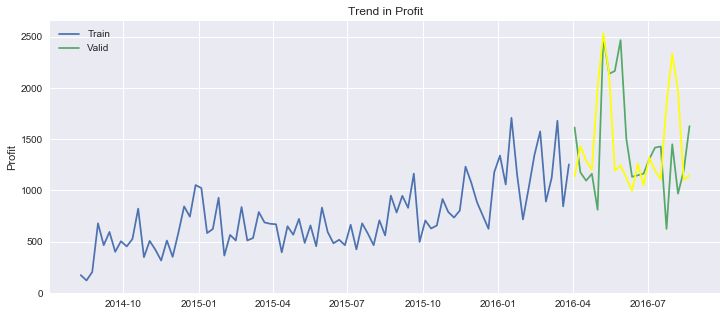

In [146]:
fig_4, ax_7 = plt.subplots()
ax_7.plot(Train["Profit"], label="Train")
ax_7.set_ylabel("Profit")
ax_7.set_title("Trend in Profit")
ax_7.plot(Valid["Profit"], label="Valid")
ax_7.legend(loc="upper left")
plt.grid(which='minor', axis='both')

#ax_7.plot(fit2.fittedvalues,color='red')

ax_7.plot(valid_hat2, color='yellow')

In [138]:
rms2 = sqrt(mean_squared_error(Valid, valid_hat2))
rms2

575.1604641921004

Although the second one seems to fit the validation set fairly well, it has a larger RMSE than the first one. For now, let's choose the first one.

#### ARIMA

Before we can model a TS using the ARIMA method, we have to make sure it is stationary. Let us create a function that tests for stationarity.

In [164]:
from statsmodels.tsa.stattools import adfuller

In [165]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(4).mean() # 24 hours on each day
    rolstd = timeseries.rolling(4).std()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

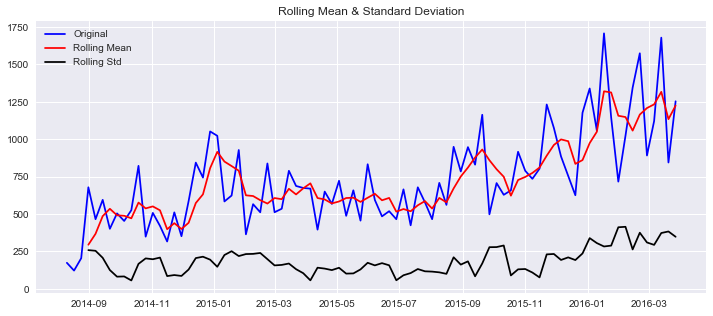

Results of Dickey-Fuller Test:
Test Statistic                 -2.430401
p-value                         0.133339
#Lags Used                      2.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


In [167]:
test_stationarity(Train["Profit"])

*The adf hypothesis is as follows*:

$H_{0}$: The time series is not stationary.

$H_{1}$: The time series is stationary.

*Decision criteria*:

Reject $H_{0}$ if the Test Statistic < Critical Value.

From our results above, we can reject $H_{0}$ and state that our time series is not stationary. To make it stationary, let's begin by differencing to remove the trend the component.

In [168]:
Train["diff"] = Train["Profit"] - Train["Profit"].shift(1)

In [169]:
Train_copy = Train.copy()

In [174]:
Train_copy.dropna(inplace=True)

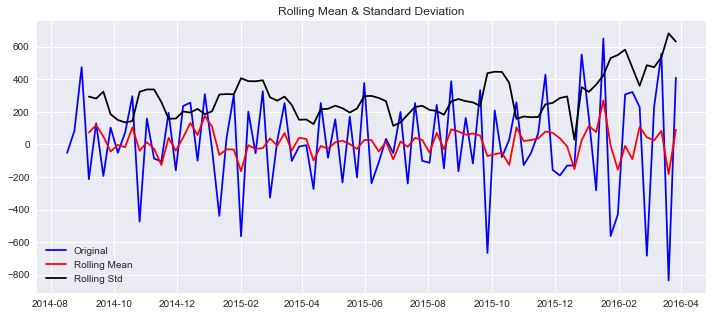

Results of Dickey-Fuller Test:
Test Statistic                -6.123625e+00
p-value                        8.734765e-08
#Lags Used                     5.000000e+00
Number of Observations Used    7.900000e+01
Critical Value (1%)           -3.515977e+00
Critical Value (5%)           -2.898886e+00
Critical Value (10%)          -2.586694e+00
dtype: float64


In [175]:
test_stationarity(Train_copy["diff"])

The test statistic is now less than our critical value. The series is now stationary. Now for the analysis.

In [176]:
from statsmodels.tsa.stattools import acf, pacf

In [177]:
lag_acf = acf(Train_copy["diff"])
lag_pacf = pacf(Train_copy["diff"], method="ols")

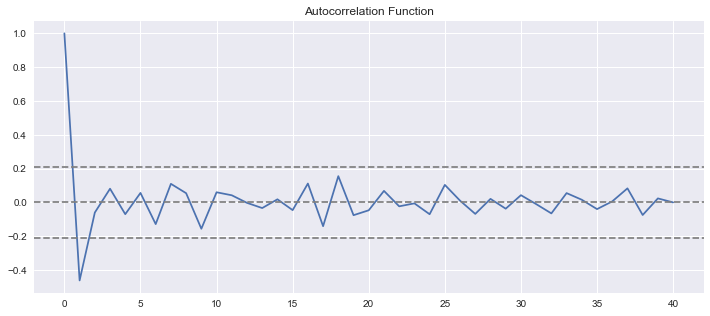

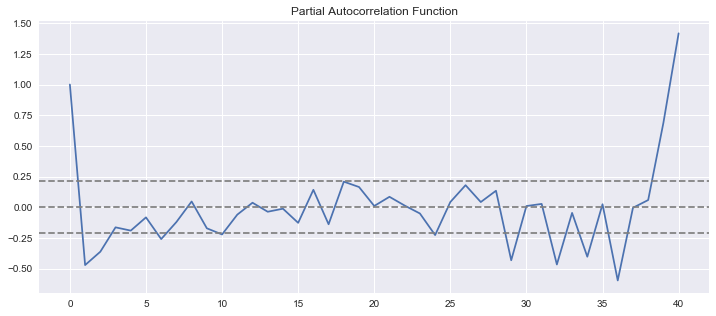

In [192]:
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Train_copy["diff"])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(Train_copy["diff"])),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Train_copy["diff"])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(Train_copy["diff"])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()

From both plots, we can deduce that *p* and *q* are both equal to 2. Since we differenced our ts once, then *d* is 1.

In [179]:
from statsmodels.tsa.arima_model import ARIMA

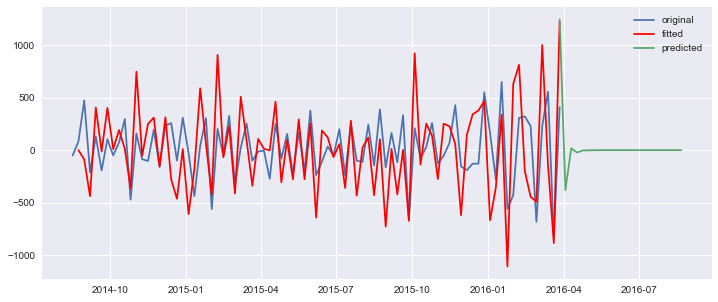

In [229]:
model = ARIMA(Train_copy["diff"], order=(2, 1, 2))  
results_ARIMA = model.fit()
plt.plot(Train_copy["diff"],  label='original')
plt.plot(results_ARIMA.fittedvalues, color='red', label='fitted')
ARIMA_predict_diff=results_ARIMA.predict(start="2016-03-27", end="2016-08-21", dynamic=True)
plt.plot(ARIMA_predict_diff, label='predicted')
plt.legend(loc='best')
plt.show()

This model seems to be fitting our training data very well, a little too well. The predicted values are mostly a straight line, with no zig zag pattern a the previou values. Lets difference our Valid dataset and plot the prediction together with this difference to further inspect this.

In [230]:
Valid["diff"] = Valid["Profit"] - Valid["Profit"].shift(1)

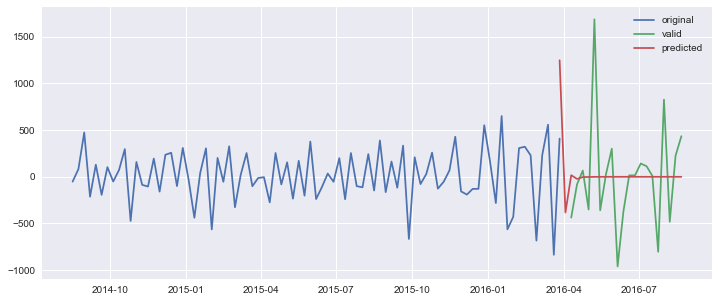

In [231]:
plt.plot(Train_copy["diff"],  label='original')
plt.plot(Valid["diff"],  label='valid')
plt.plot(ARIMA_predict_diff, label='predicted')
plt.legend(loc='best')
plt.show()

In [236]:
Valid["diff"].dropna(inplace=True)

In [239]:
rms3 = sqrt(mean_squared_error(Valid["diff"], ARIMA_predict_diff[2:]))
rms3

560.8669806894181

#### SARIMAX

SARIMAX model takes into account the seasonality of the time series. So we will build a SARIMAX model on the time series.

In [242]:
import statsmodels.api as sm

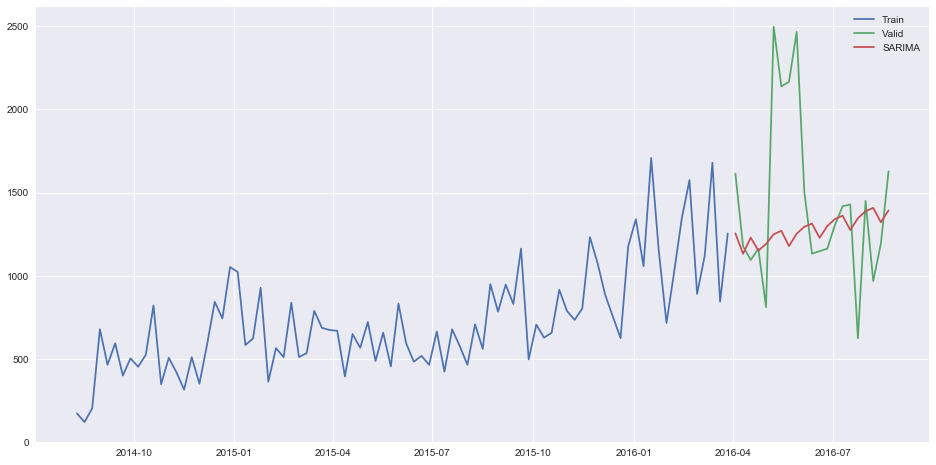

In [249]:
fit2 = sm.tsa.statespace.SARIMAX(Train["Profit"], order=(2, 1, 0), enforce_stationarity=True, seasonal_order=(0,1,1,4)).fit()
Valid["SARIMA"] = fit2.predict(start="2016-03-27", end="2016-08-21", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( Train['Profit'], label='Train')
plt.plot(Valid['Profit'], label='Valid')
plt.plot(Valid["SARIMA"], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [250]:
rms4 = sqrt(mean_squared_error(Valid["Profit"], Valid["SARIMA"]))
rms4

532.9691315402101

In [252]:
rms_list = ["RMSE", rms, rms2, rms3, rms4]
models = ["Model Name", "HW1", "HW2", "ARIMA", "SARIMAX"]

for model, rms in zip(models, rms_list):
    print(model, rms)

Model Name RMSE
HW1 532.3494853904493
HW2 575.1604641921004
ARIMA 560.8669806894181
SARIMAX 532.9691315402101


After all the models that we have used we can conclude that the first Holt Winter's model we used is the best one since it produces the least RMSE. We will now train our entire dataset on that model and then predict the sales for the follwong year.

#### Final Model

In [255]:
Store_312_weekly = Store_312[["Profit"]].resample("W").sum()
final_fit = ExponentialSmoothing(Store_312_weekly["Profit"], trend='add', seasonal='mul', seasonal_periods=12).fit(use_boxcox=True)

In [261]:
following_year_forecast = final_fit.forecast(70)

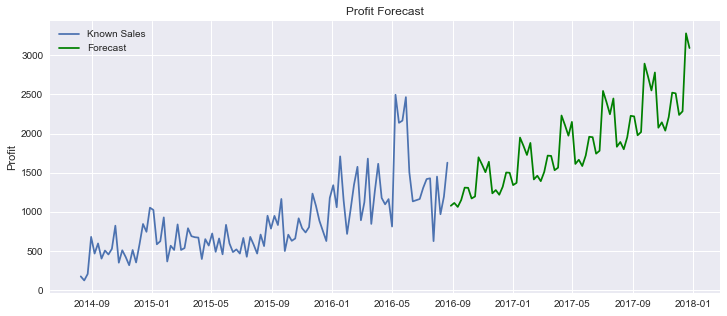

In [262]:
fig_f, ax_f = plt.subplots()
ax_f.plot(Store_312_weekly["Profit"], label="Known Sales")
ax_f.set_ylabel("Profit")
ax_f.set_title("Profit Forecast")
plt.grid(which='minor', axis='both')
#ax_f.plot(final_fit.fittedvalues, color='red')
ax_f.plot(following_year_forecast, color='green', label="Forecast")

ax_f.legend(loc="upper left")

The green part of our graph represnts the forecast to the year ending 2017.

However, because we had very little data to begin with, our granular forecast becomes less and less accurate as time goes on. It is mostly accurate in the 3 months of our data, before the seasonality in the forecast starts to repeat itself. The best thing to do would be to fine tune our model every 3 months, adding data to it to predict the following 3 months and so on.

There is still a way to at least get an accurate forecast of our trend. We can smooth our the forecast by resampling or a rolling mean.

In [265]:
Store_312_weekly_copy = Store_312_weekly.copy()

In [286]:
Store_312_weekly_copy["Profit"].append(following_year_forecast).tail()

2017-11-26    2514.202032
2017-12-03    2238.256194
2017-12-10    2284.622790
2017-12-17    3281.458394
2017-12-24    3093.736305
dtype: float64

In [287]:
Store_312_Q_forecast = Store_312_weekly_copy["Profit"].append(following_year_forecast).resample("Q").mean()

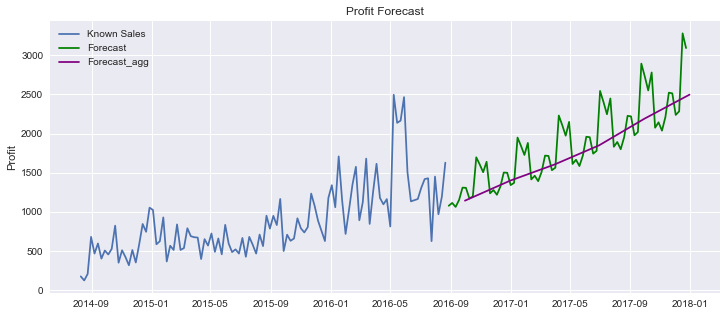

In [299]:
fig_f, ax_f = plt.subplots()
ax_f.plot(Store_312_weekly["Profit"], label="Known Sales")
#ax_f.plot(Store_312_Q_forecast.loc[:"2016-10-30"], label="KnownSales_agg")

ax_f.set_ylabel("Profit")
ax_f.set_title("Profit Forecast")

plt.grid(which='minor', axis='both')

ax_f.plot(following_year_forecast, color='green', label="Forecast")
ax_f.plot(following_year_forecast.resample("Q").mean(), label="Forecast_agg", color="purple")

ax_f.legend(loc="upper left")

In [310]:
Profit_by_Y = Store_312_weekly_copy["Profit"].append(following_year_forecast.resample("M").sum()).resample("Y").sum()

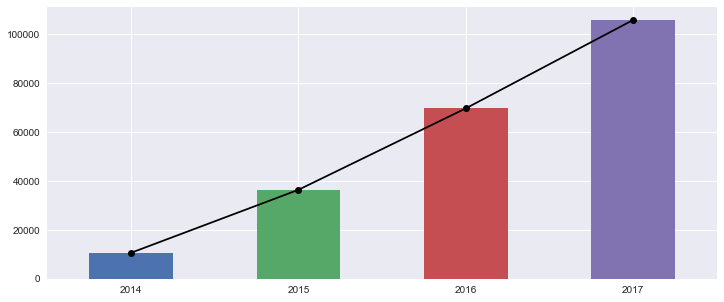

In [324]:
Profit_by_Y.to_frame()
Profit_by_Y.plot.bar()
Profit_by_Y.plot(marker="o", color="black")

In [325]:
Profit_by_Y.tail(1)

2017    105810.990633
dtype: float64

We can ignore the first bar since we know that we don't have enough information for it. Our data only begins in Sep 2014. However, 2015 is an accurate representation, while 2016 ends in Sep 2016, but we trust that our predictions for the closing months of 2016 are fairly accurate. 2017 is a total prediction. It is what we are forecasting the profit to be by that year end.

Our trend shows an increase in profits across the years. **To answer our last question for this project, the predicted profit for 2017 is 105, 810.**